/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 0.0103 - val_loss: 0.0045
Epoch 2/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 3/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 4/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 5/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 24s 58ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 7/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 8/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 42s 58ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 10/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 11/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 12/30
410/410 ━━━━━━━━━━

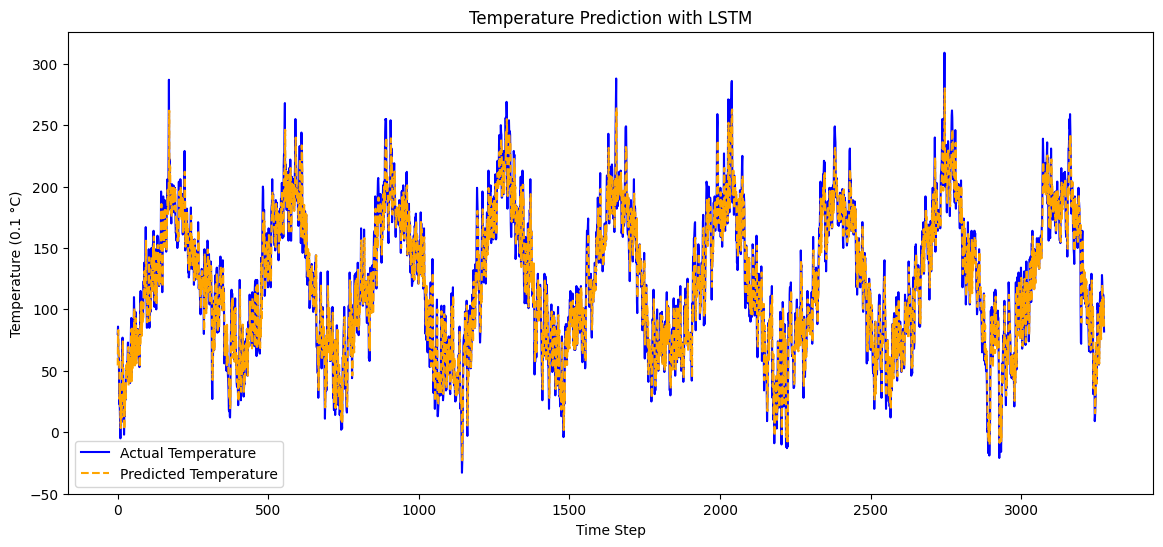

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Data Preparation
# Load data
df = pd.read_csv('/content/london_weather_data_1979_to_2023.csv')

# Preprocess dates and set index
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.set_index('DATE', inplace=True)

# Use only the 'TG' column (mean daily temperature in 0.1 °C)
data = df['TG'].values.astype(float)

# Data cleaning: Replace invalid temperature values with NaN
data[data < -200] = np.nan

# Fill missing values using linear interpolation
data = pd.Series(data).interpolate(limit_direction='both').values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60  # Number of days to look back
X, y = create_sequences(scaled_data, window_size)

# 2. Train-Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 3. LSTM Model Architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 4. Training
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# 5. Forecasting and Evaluation
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_original = scaler.inverse_transform(y_test)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test_original, predicted))
mae = mean_absolute_error(y_test_original, predicted)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

# Plotting the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_original, label='Actual Temperature', color='blue')
plt.plot(predicted, label='Predicted Temperature', color='orange', linestyle='--')
plt.title('Temperature Prediction with LSTM')
plt.xlabel('Time Step')
plt.ylabel('Temperature (0.1 °C)')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.0246 - loss: 3.0476
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1797 - loss: 3.0255
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.1514 - loss: 3.0015
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1514 - loss: 2.9581
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1410 - loss: 2.8431
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1097 - loss: 2.6936
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1305 - loss: 2.7039
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1618 - loss: 2.5952
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1902 - loss: 2.5949
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1760 - loss: 2.5070
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1760 - loss: 2.5876
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.1902 - loss: 2.5249
Epoch 13/50


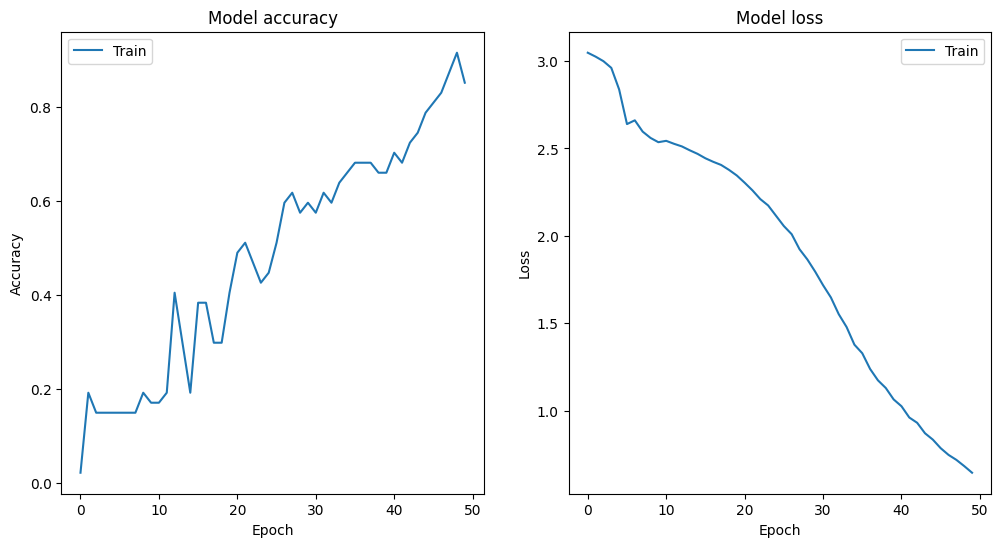

Harry Potter and the sorcerer’s stone harry


In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load and Preprocess the Data
df = pd.read_csv('Harry_Potter_Scraped_Dataset.csv')
corpus = ' '.join(df['Book Name'].astype(str))

tokenizer = Tokenizer()
tokenizer.fit_on_texts([corpus])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

X, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = to_categorical(labels, num_classes=total_words)

# 2. Define the LSTM Model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the Model
history = model.fit(X, y, epochs=50, verbose=1)

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

plt.show()

# 4. Generate Text
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example Usage
seed_text = "Harry Potter"
next_words = 5
generated_text = generate_text(seed_text, next_words, model, max_sequence_len)
print(generated_text)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
Accuracy: 0.9821
Precision: 0.9779
F1-score: 0.9301


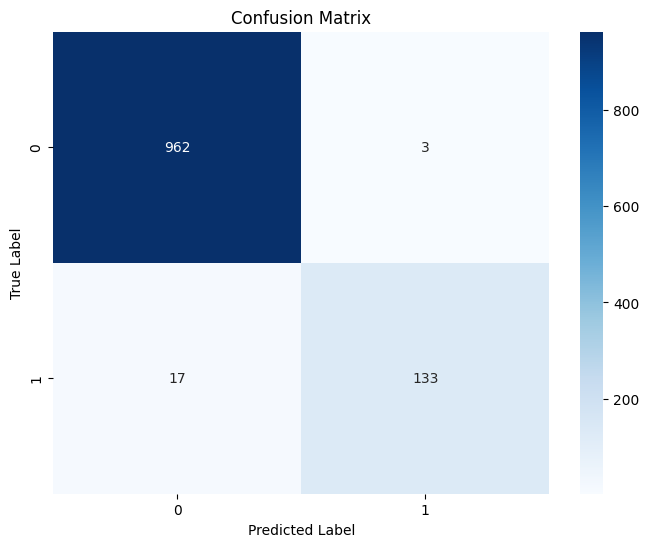

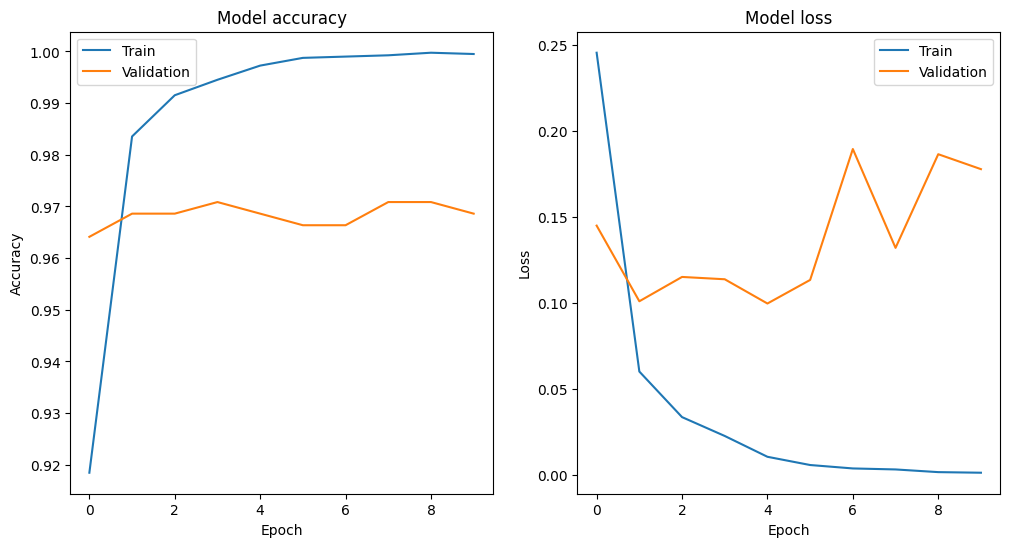

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

# 1. Data Preparation
# Load the data
df = pd.read_csv('spam.csv', encoding='latin1')

# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Convert labels to numerical values (0 and 1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# 2. Model Building
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)  # Limit vocabulary size
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Model architecture
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Training and Evaluation
# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.1, verbose=0)

# Make predictions
y_pred = model.predict(X_test_pad)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
